In [1]:
library(edgeR)
library(ggplot2)
library(ComplexHeatmap)
library(circlize)
library(dplyr)
library(grid)
library(stats)
# library(tdlyr)

Loading required package: limma

Loading required package: grid

ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please c

In [2]:
data_path = "/mnt/nrdstor/wanlab/xinchaowu/lung_cancer_subtype/data/"
save_path = "/mnt/nrdstor/wanlab/xinchaowu/lung_cancer_subtype/binary_output/"
tpm_file = "binary_classification_tpm.csv"
meta_data_file = "binary_classification_tpm_metadata.csv"

tpm = read.csv(paste0(data_path, tpm_file))
meta_data = read.csv(paste0(data_path, meta_data_file))

rownames(tpm) = make.unique(as.character(tpm[,1]))
tpm = tpm[, -1]
rownames(meta_data) = make.unique(as.character(meta_data[,1]))
meta_data = meta_data[,-1]

In [3]:
log2TPM = t(log2(tpm + 1))
design = model.matrix(~ cancer_subtype, data = meta_data)

fit = lmFit(log2TPM, design)
fit = eBayes(fit)

result = topTable(fit, coef=2, adjust.method = "fdr")

Warning message:
“Zero sample variances detected, have been offset away from zero”


In [4]:
dim(result)

[1] 10  6

In [5]:
de_genes <- topTable(fit, adjust.method = "BH", p.value = 0.05, number = Inf, lfc=1)
dim(de_genes)

Removing intercept from test coefficients



[1] 1865    6

In [6]:
dim(de_genes)
head(de_genes)
head(tpm)

[1] 1865    6

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KRT5,8.793774,5.918331,65.85517,0.000000e+00,0.000000e+00,954.7423
DSC3,5.640573,3.310890,60.52775,0.000000e+00,0.000000e+00,870.8709
DSG3,6.361091,3.338388,60.34884,0.000000e+00,0.000000e+00,867.9924
TP63,5.162558,4.244403,52.37281,0.000000e+00,0.000000e+00,735.6453
BNC1,3.805980,2.093924,50.14672,5.073669e-309,6.155375e-305,697.3677
CLCA2,5.536274,3.335872,49.64738,3.004610e-305,3.037660e-301,688.7069


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,⋯,AL451106.1,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ce29461e-97c1-47cc-bef8-65f2637927e8.rna_seq.augmented_star_gene_counts.tsv,43.9446,0.0420,160.1180,7.6135,6.7546,17.9309,36.5914,32.9470,35.9382,37.7575,⋯,0,0.0000,0.8804,0,0.0000,0.0000,6.2046,0,0.0193,1.1430
76413057-e8a8-42b7-b545-897e3b32580d.rna_seq.augmented_star_gene_counts.tsv,39.0304,0.0979,40.7109,7.2860,3.2923,17.0078,65.2349,31.5986,3.0689,27.6457,⋯,0,0.0000,0.0507,0,0.0000,0.0000,14.7163,0,0.0300,0.7742
b734515f-18ac-4a4b-8272-dc54d8d945a4.rna_seq.augmented_star_gene_counts.tsv,52.7796,0.0909,87.5809,6.5918,3.8224,21.6515,33.3737,33.5826,43.1303,32.4052,⋯,0,0.0000,0.4358,0,0.0000,0.0168,8.8029,0,0.0279,0.9988
f7683b51-cca9-4079-9e34-b9a4fdd27d85.rna_seq.augmented_star_gene_counts.tsv,32.5934,0.6097,59.9902,12.8140,7.2224,21.0470,54.5961,43.3730,12.6172,25.8268,⋯,0,10.9090,0.1579,0,17.4365,0.0000,7.1086,0,0.1106,0.5844
2c76e0e5-8a5c-4edf-9812-3f5e296ba2a6.rna_seq.augmented_star_gene_counts.tsv,40.7170,0.8526,94.8091,13.0257,10.4746,22.3394,124.9068,68.6612,24.5026,36.3586,⋯,0,25.3142,0.5939,0,49.0870,0.0000,10.9270,0,0.0857,0.5166
bc8b6dee-0f79-492f-85e1-c1a09d6f9680.rna_seq.augmented_star_gene_counts.tsv,81.2030,0.0000,81.9675,13.1746,4.5163,27.1708,88.0536,32.7966,5.5038,41.7848,⋯,0,0.0000,0.2703,0,0.0000,0.0000,11.3278,0,0.0458,0.8516


# import prediction result

In [7]:
predict_result_path = "/common/wanlab/xinchaowu/Lung_cancer_subtypes/TCGA_lung_rna_seq/"
PRSLeaner_predict_result = paste0(predict_result_path, "RPSLearner_predict_label.csv")

Lasso_prediction_result_path = "/work/wanlab/xinchaowu/project/Lung_Cancer_subtypes/output/"
Lasso_prediction_reulst = paste0(Lasso_prediction_result_path, "tcga_binary_diagnosis_Lasso_prediction_cv_42.csv")


In [8]:
RPSLearner_prediction_df = read.csv(PRSLeaner_predict_result)
Lasso_prediction_df = read.csv(Lasso_prediction_reulst)

rownames(RPSLearner_prediction_df) = make.unique(as.character(RPSLearner_prediction_df[,1]))
rownames(Lasso_prediction_df) = make.unique(as.character(Lasso_prediction_df[,1]))

RPSLearner_prediction_df = as.data.frame(RPSLearner_prediction_df[, -1])
Lasso_prediction_df = Lasso_prediction_df[, -1]

head(RPSLearner_prediction_df)
head(Lasso_prediction_df)

,"RPSLearner_prediction_df[, -1]"
,<chr>
1,True
2,False
3,True
4,False
5,True
6,False


,y_true,y_pred
,<dbl>,<dbl>
ce29461e-97c1-47cc-bef8-65f2637927e8.rna_seq.augmented_star_gene_counts.tsv,1,1
76413057-e8a8-42b7-b545-897e3b32580d.rna_seq.augmented_star_gene_counts.tsv,0,0
b734515f-18ac-4a4b-8272-dc54d8d945a4.rna_seq.augmented_star_gene_counts.tsv,1,1
f7683b51-cca9-4079-9e34-b9a4fdd27d85.rna_seq.augmented_star_gene_counts.tsv,0,0
2c76e0e5-8a5c-4edf-9812-3f5e296ba2a6.rna_seq.augmented_star_gene_counts.tsv,1,1
bc8b6dee-0f79-492f-85e1-c1a09d6f9680.rna_seq.augmented_star_gene_counts.tsv,0,0


In [9]:
combined_result = cbind(RPSLearner_prediction_df, Lasso_prediction_df) %>% 
    rename(
        "RPSLearner" = "RPSLearner_prediction_df[, -1]",
        "Lasso" = "y_pred"
    )

In [10]:
log2TPM = t(log2(tpm + 1))
DEG_results = list()

prediction_methods = colnames(combined_result)
for (method in prediction_methods) {
    meta_data$predicted_subtype = combined_result[[method]]
    design = model.matrix(~ predicted_subtype, data=meta_data)
    fit = lmFit(log2TPM, design)
    fit = eBayes(fit)
    result = topTable(fit, coef=2, adjust.method = "fdr", number = Inf)
    result = result[result$adj.P.Val < 0.001 & abs(result$logFC) > 3 & result$AveExpr > 1, ]
    DEG_results[[method]] = result
}

Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”


# Heatmap

In [13]:
label_mapping = c(
     "False"= "LUAD", 
     "True"= "LUSC"
)

# Extract top differentially expressed genes (DEGs)
de_genes = DEG_results[["RPSLearner"]]
# top_genes <- de_genes[order(de_genes$P.Value, -de_genes$logFC)[1:20], ]  # Top 50 significant genes [1:200,]

# Get top 10 genes with highest (most positive) log2FC
top10 <- de_genes %>%
  arrange(desc(logFC)) %>%
  head(15)

# Get top 10 genes with lowest (most negative) log2FC
bottom10 <- de_genes %>%
  arrange(logFC) %>%
  head(15)

# Combine the two sets
combined_top_bottom <- bind_rows(top10, bottom10)

top_genes = combined_top_bottom
gene_names = rownames(top_genes)

expr_matrix <- tpm[, gene_names]
expr_scaled <- t(scale(t(expr_matrix)))

col_dist = dist(t(expr_scaled))
col_hc = hclust(col_dist)
col_order = col_hc$order

# clusters = cutree(col_hc, k=2)
# clusters_ordered <- clusters[col_order]

logFC_clusters = ifelse(top_genes$logFC < 0, 1, 2)
names(logFC_clusters) = rownames(top_genes)

gene_order_df = data.frame(
    gene = colnames(expr_scaled)[col_order],
    cluster = logFC_clusters[colnames(expr_scaled)[col_order] ],
    order = seq_along(col_order)
)

gene_order_df = gene_order_df[order(gene_order_df$cluster, gene_order_df$order), ]

expr_scaled_ordered <- expr_scaled[, gene_order_df$gene]

# Assign gene name labels every 10th gene
genes_in_order <- colnames(expr_scaled_ordered)
gene_labels = rep("", length(genes_in_order))
gene_labels[seq(1, length(genes_in_order), by = 4)] = genes_in_order[seq(1, length(genes_in_order), by = 4)]

# col_fun <- colorRamp2(breaks = c(-4, 1, 2), 
#                       colors = c("blue", "white", "red"))



In [10]:
# dim(expr_scaled_ordered)
# expr_scaled_ordered
# combined_result$RPSLearner == "True"
# table(combined_result %>% mutate(RPSLearner = recode(RPSLearner, !!!label_mapping)) %>% pull(RPSLearner))
luad_samples = combined_result %>% mutate(RPSLearner = recode(RPSLearner, !!!label_mapping)) %>% pull(RPSLearner) == 'LUAD'

colSums(expr_scaled_ordered[luad_samples,])

sorted_genes <- c(
  "SFTPB",
  "CEACAM6",
  "SLC34A2",
  "KRT7",
  "NAPSA",
  "SPINK1",
  "SFTA2",
  "C16orf89",
  "FOLR1",

  "NKX2.1",

  "TMC5",
  "SLC22A31",
  "CAPN8",
  "MUC21",
  "SFTA3",
  "SPRR1B",
  "KRT17",
  "KRT6A",
  "KRT5",
  "KRT16",
  "PKP1",
  "KRT14",
  "KRT6B",
  "SPRR2A",
  "TP63",
  "SPRR1A",
  "KRT13",
  "CLCA2",
  "DSG3",
  "DSC3"
)

expr_scaled_ordered_new = expr_scaled_ordered[, sorted_genes]

SFTPB        KRT7      SPINK1       NAPSA       MUC21       CAPN8 
2451.823828  251.676343   11.687437  219.738172 -191.046437 -183.784825 
       TMC5      NKX2.1       SFTA3    SLC22A31       SFTA2    C16orf89 
-173.057627 -132.806180 -220.660202 -181.447144   -8.701547  -73.958623 
      FOLR1     CEACAM6     SLC34A2        KRT5       KRT6A       KRT17 
 -87.633971 1271.387157  749.546773 -242.696773 -136.903158 -101.455019 
      KRT14       KRT13      SPRR2A      SPRR1A      SPRR1B       KRT16 
-262.310914 -277.057916 -272.043521 -276.134987 -242.612537 -254.958377 
       PKP1       KRT6B        DSG3        DSC3       CLCA2        TP63 
-255.112472 -271.343954 -279.865886 -279.913632 -277.521886 -272.832121

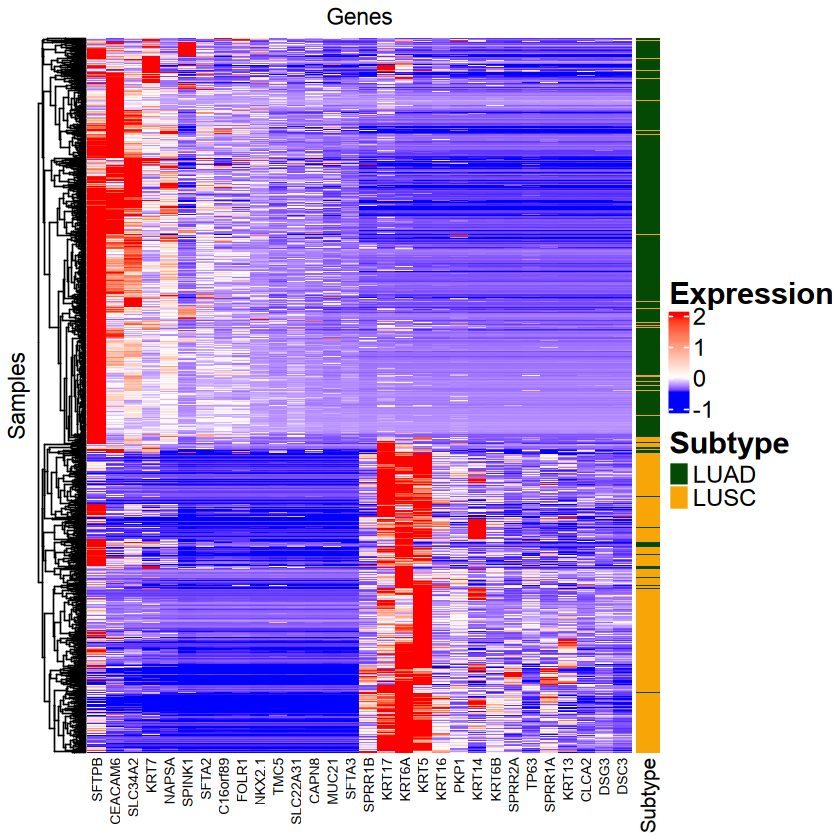

In [17]:
col_fun <- colorRamp2(
  breaks = c(-0.5, 0, 2), 
  colors = c("blue", "white", "red")
)

h = Heatmap(expr_scaled_ordered_new,
        name = "Z-score",
        col = col_fun,
        # row_split = 2,
        row_title = "Samples",
        show_row_names = FALSE,
        
        column_title = "Genes",
        # column_split = 2,
        # cutree_columns = 4,
        show_column_names = T,
        show_column_dend = FALSE,
        cluster_columns = FALSE,
        # column_labels = gene_labels,
        column_names_gp = grid::gpar(fontsize = 8),
        heatmap_legend_param = list(
            title = "Expression", 
            title_gp = grid::gpar(fontsize = 18, fontface = "bold"),
            labels_gp = grid::gpar(fontsize = 14)
        ),
        right_annotation = rowAnnotation(
          Subtype = combined_result %>% mutate(RPSLearner = recode(RPSLearner, !!!label_mapping)) %>% pull(RPSLearner),  # A vector indicating sample groups
          col = list(Subtype = c("LUSC" = "#f7a507", "LUAD" = "#044904")),
          annotation_legend_param = list(
            title_gp = grid::gpar(fontsize = 18, fontface = "bold"),  # Title size
            labels_gp = grid::gpar(fontsize = 14)
          )
        )
)

h

In [18]:
# png(paste0(save_path, "DEG_heatmap_RPSLearner.png"), res = 300, width = 3500, height = 1800)
pdf(paste0(save_path, "DEG_heatmap_RPSLearner.pdf"), width = 12, height = 6)
h
dev.off()

pdf 
  2

# Volcano plot

In [12]:
log2TPM = t(log2(tpm + 1))
DEG_results = list()

prediction_methods = colnames(combined_result)
for (method in prediction_methods) {
    meta_data$predicted_subtype = combined_result[[method]]
    design = model.matrix(~ predicted_subtype, data=meta_data)
    fit = lmFit(log2TPM, design)
    fit = eBayes(fit)
    result = topTable(fit, coef=2, adjust.method = "fdr", number = Inf)
    # result = result[result$adj.P.Val < 0.05 & abs(result$logFC) > 1, ]
    DEG_results[[method]] = result
}

Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”


In [13]:
library(ggrepel)

res = DEG_results[["RPSLearner"]] %>% 
    mutate(adj_p_val_mod = pmin(-log10(adj.P.Val + 10e-300), 200))

top_LUSC <- res %>%
  filter(adj.P.Val < 0.05 & logFC > 1) %>%
  # pick the 5 with largest logFC
  slice_max(logFC, n = 5)

top_LUAD <- res %>%
  filter(adj.P.Val < 0.05 & logFC < -1) %>%
  # pick the 5 with smallest logFC (or largest negative)
  slice_min(logFC, n = 5)

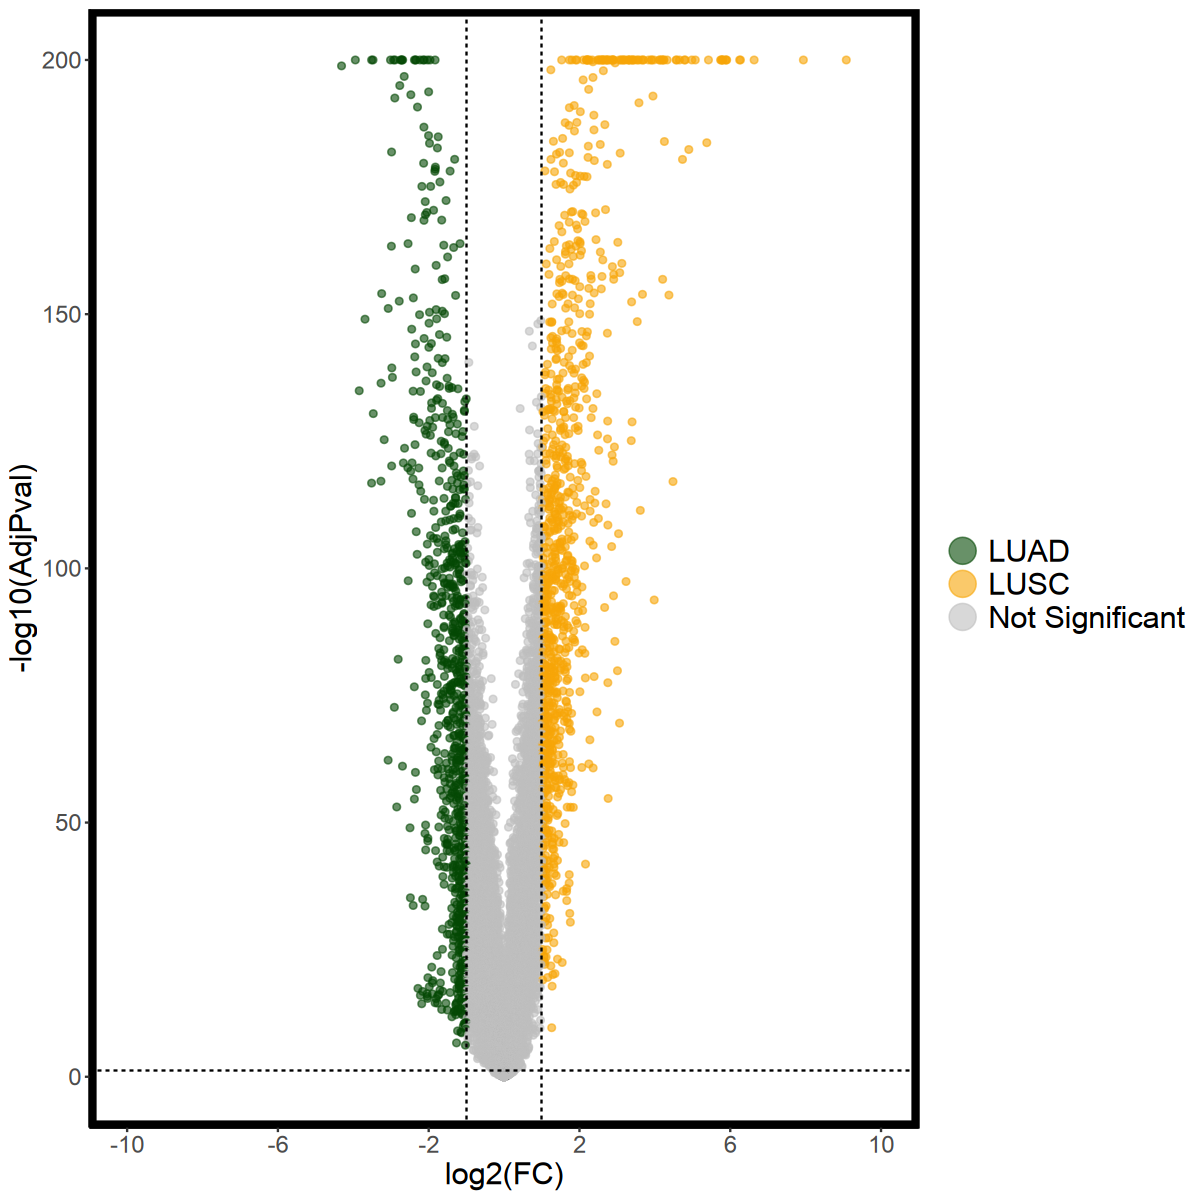

In [68]:

# Create a volcano plot "LUSC" = "#f7a507", "LUAD" = "#044904"
volcano_plot <- ggplot(res, aes(x = logFC, y = adj_p_val_mod)) +
  geom_point(aes(color = ifelse(adj.P.Val < 0.05 & logFC > 1, "LUSC",
                           ifelse(adj.P.Val < 0.05 & logFC < -1, "LUAD", "Not Significant"))),
             alpha = 0.6, size = 1.5) +
  scale_y_continuous(limits = c(0, 200)) +
  scale_x_continuous(limits = c(-10, 10), breaks = seq(-10, 10, by = 4)) +  # Set x-axis ticks
  scale_color_manual(values = c("Not Significant" = "gray",
                                "LUAD" = "#044904",
                                "LUSC" = "#f7a507")) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = c("black", "black")) +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "black") +
  labs(x = "log2(FC)", y = "-log10(AdjPval)", color = " ") +
  theme_classic() +
  theme(
    panel.grid = element_blank(),                          # Remove grid lines
    panel.border = element_rect(color = "black", fill = NA, size = 3),  # Add frame border
    legend.text = element_text(size = 18),                 # Increase legend text size
    legend.title = element_text(size = 14),                # Increase legend title size
    axis.title = element_text(size = 18),                   # Increase axis label text size
    axis.text.x = element_text(size = 14),                 # Increase x-axis tick label size
    axis.text.y = element_text(size = 14) 
  )+
  # Add labels for top LUAD genes
  # geom_text_repel(
  #   data = top_LUAD, 
  #   aes(label = rownames(top_LUAD)),
  #   size = 6,                # Text label size
  #   color = "#044904",       # Color to match LUAD
  #   max.overlaps = Inf       # Allow all text to appear
  # ) +
  # # Add labels for top LUSC genes
  # geom_text_repel(
  #   data = top_LUSC, 
  #   aes(label = rownames(top_LUSC)),
  #   size = 6,                # Text label size
  #   color = "#f7a507",       # Color to match LUSC
  #   max.overlaps = Inf
  # ) +
  # Increase legend marker size
  guides(color = guide_legend(override.aes = list(size = 7)))

print(volcano_plot)

# ggsave(paste0(save_path, "volcano_plot_degs_RPSLearner.pdf"), volcano_plot, width = 10, height=6)
# ggsave(dpi = )
ggsave(paste0(save_path, "volcano_plot_degs_RPSLearner.png"), volcano_plot, width = 12, height=6, dpi = 600)

# Venn Diagram

In [20]:
library(ggVennDiagram)

log2TPM = t(log2(tpm + 1))
DEG_results = list()
deg_list = list()

prediction_methods = colnames(combined_result)
for (method in prediction_methods) {
    meta_data$predicted_subtype = combined_result[[method]]
    design = model.matrix(~ predicted_subtype, data=meta_data)
    fit = lmFit(log2TPM, design)
    fit = eBayes(fit)
    result = topTable(fit, coef=2, adjust.method = "fdr", number = Inf)
    result = result[result$adj.P.Val < 0.001 & abs(result$logFC) > 1, ]
    DEG_results[[method]] = result
    deg_list[[method]] = rownames(result)
}

# Create a list of DEG sets
# deg_list <- list(
#   Lasso = rownames(DEG_results[["Lasso"]]),
#   RPSLearner = rownames(DEG_results[["RPSLearner"]]),
#   ground_truth = rownames(DEG_results[["y_true"]])
# )

# Generate Venn diagram


Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”


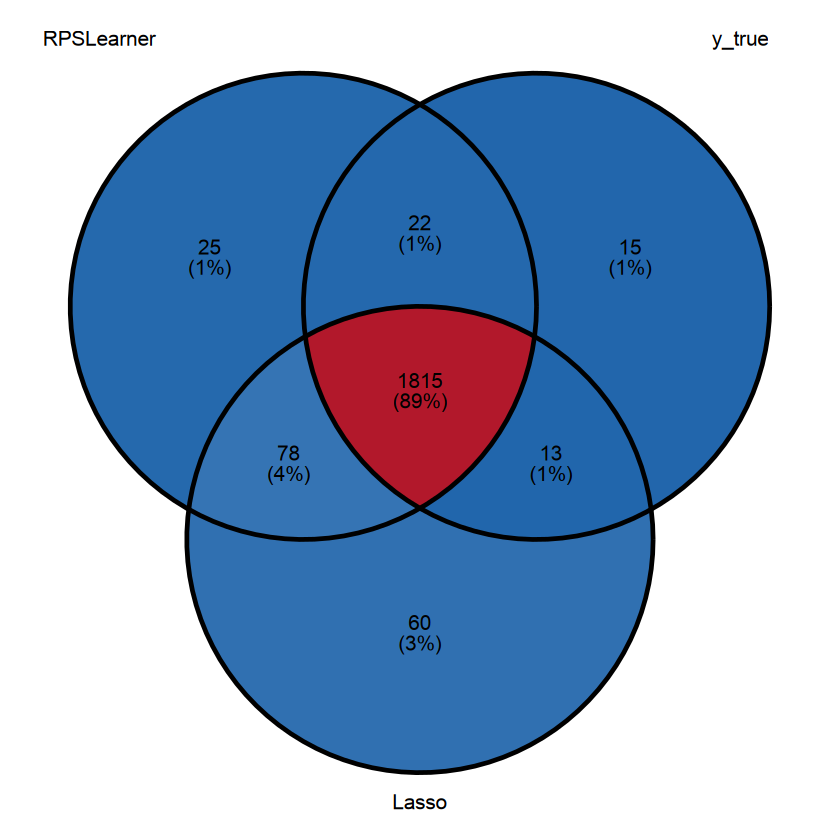

In [208]:
venn_plot <- ggVennDiagram(deg_list, label_alpha = 0) +
  theme(legend.position = "none") + 
  scale_fill_distiller(palette = "RdBu")


print(venn_plot)

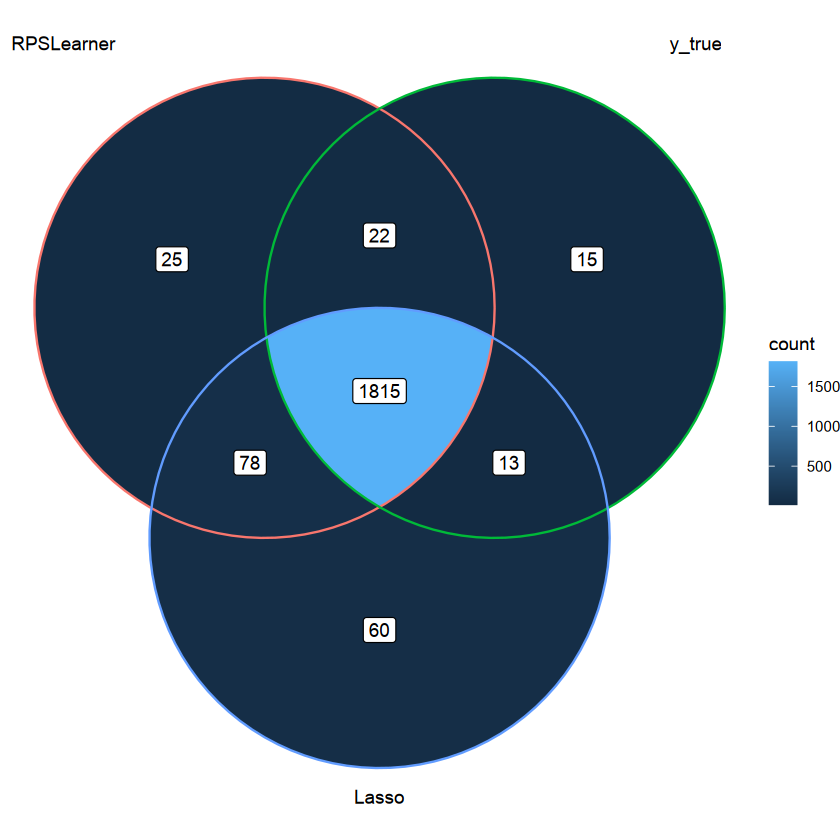

In [213]:
venn <- Venn(deg_list)
data <- process_data(venn)
ggplot() +
  # 1. region count layer
  geom_polygon(aes(X, Y, fill = count, group = id), 
          data = venn_regionedge(data)) +
  # 2. set edge layer
  geom_path(aes(X, Y, color = id, group = id), 
          data = venn_setedge(data), 
          show.legend = FALSE) +
  # 3. set label layer
  geom_text(aes(X, Y, label = name), 
               data = venn_setlabel(data)) +
  # 4. region label layer
  geom_label(aes(X, Y, label = count), 
                data = venn_regionlabel(data)) +
  coord_equal() +
  theme_void()

In [21]:
names(deg_list) = c("RPSLearner", "Label", "Lasso")

In [22]:
deg_list = list(
    "RPSLearner" = deg_list$RPSLearner, "Label" = deg_list$Label)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


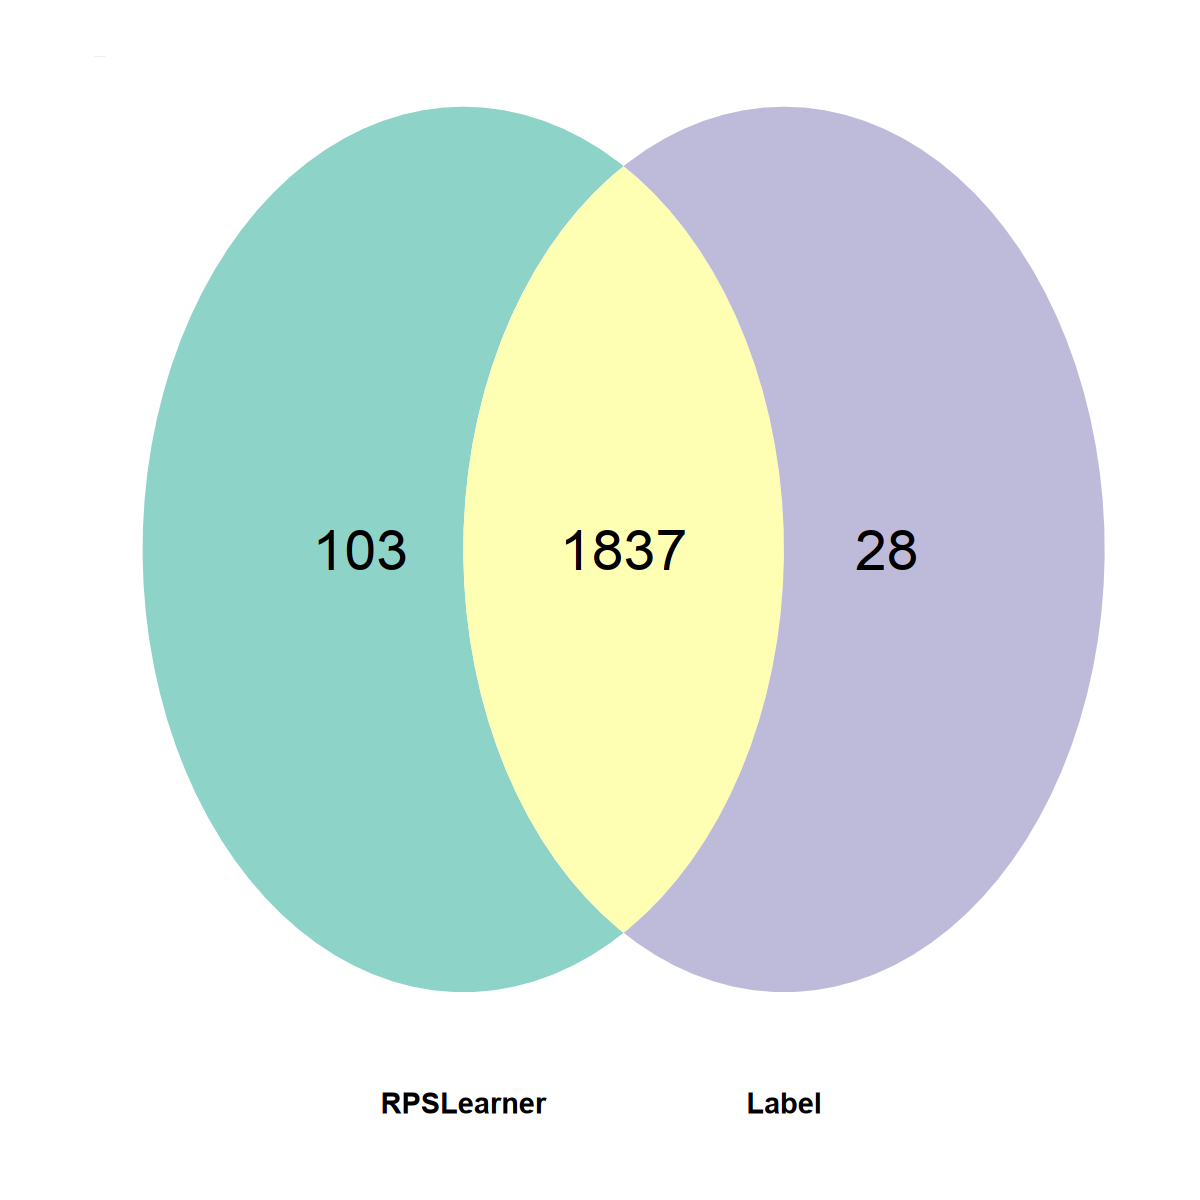

In [34]:
venn <- Venn(deg_list)
data <- process_data(venn)

options(repr.plot.width = 10, repr.plot.height = 10)
venn = ggplot() +
  # change mapping of color filling
  geom_polygon(aes(X, Y, fill = id, group = id), 
          data = venn_regionedge(data),
          show.legend = FALSE,
          color = NA) +
  # adjust edge size and color
  geom_path(aes(X, Y, color = "red", group = id), 
          data = venn_setedge(data), 
          linewidth = 0,
          show.legend = FALSE) +
  # show set label in bold
  geom_text(aes(X, Y, label = name), 
            fontface = "bold",
            size = 6,
            data = venn_setlabel(data)) +
  geom_text(aes(X, Y, label = count), 
             data = venn_regionlabel(data),
             size = 12,
             alpha = 1) +
  coord_equal() +
  coord_flip() +
  theme_void() +
  ggtitle("My Venn Diagram Title") +
  scale_fill_brewer(palette = "Set3") +
  theme(
      plot.title = element_text(size = 0, face = "bold"),
      plot.margin = margin(t = 1, r = 1, b = 1, l = 2, unit = "cm")
  )
venn
ggsave(paste0(save_path, "venn_deg_diagram.pdf"), venn, width = 8, height = 6)

In [222]:
# str(venn_regionedge(data))
# venn_regionedge(data)[[2]]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_bar()`).”


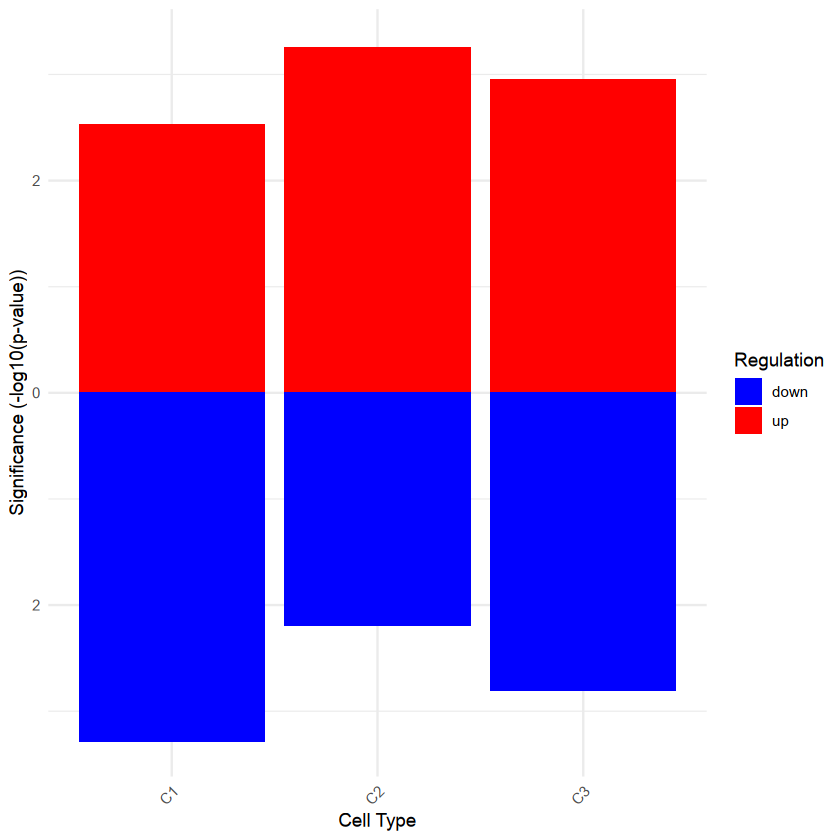

In [1]:
# Load required packages
library(dplyr)
library(ggplot2)

# Set seed for reproducibility
set.seed(123)

# Simulate data for up-regulated DEGs
up_list <- list(
  C1 = data.frame(GO_term = paste0("GO_up_C1_", 1:5), p_value = runif(5, 0.0001, 0.01)),
  C2 = data.frame(GO_term = paste0("GO_up_C2_", 1:5), p_value = runif(5, 0.0001, 0.01)),
  C3 = data.frame(GO_term = paste0("GO_up_C3_", 1:5), p_value = runif(5, 0.0001, 0.01))
)

# Simulate data for down-regulated DEGs
down_list <- list(
  C1 = data.frame(GO_term = paste0("GO_down_C1_", 1:5), p_value = runif(5, 0.0001, 0.01)),
  C2 = data.frame(GO_term = paste0("GO_down_C2_", 1:5), p_value = runif(5, 0.0001, 0.01)),
  C3 = data.frame(GO_term = paste0("GO_down_C3_", 1:5), p_value = runif(5, 0.0001, 0.01))
)

# Function to select top 3 GO terms and assign values
select_top3 <- function(df, regulation) {
  top3 <- df %>%
    arrange(p_value) %>%
    head(3)
  top3$regulation <- regulation
  if (regulation == "up") {
    top3$value <- -log10(top3$p_value)  # Positive values for up-regulated
  } else {
    top3$value <- log10(top3$p_value)   # Negative values for down-regulated
  }
  return(top3)
}

# Process up-regulated data
up_data <- lapply(names(up_list), function(ct) {
  df <- up_list[[ct]]
  top3 <- select_top3(df, "up")
  top3$cell_type <- ct
  return(top3)
})
up_data <- do.call(rbind, up_data)

# Process down-regulated data
down_data <- lapply(names(down_list), function(ct) {
  df <- down_list[[ct]]
  top3 <- select_top3(df, "down")
  top3$cell_type <- ct
  return(top3)
})
down_data <- do.call(rbind, down_data)

# Combine into a single data frame
plot_data <- rbind(up_data, down_data)

# Calculate the maximum absolute value for symmetric y-axis
max_val <- max(abs(plot_data$value))

# Create the stacked bar plot with symmetric y-axis
ggplot(plot_data, aes(x = cell_type, y = value, fill = regulation)) +
  geom_bar(stat = "identity", position = "stack") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Cell Type",
       y = "Significance (-log10(p-value))",
       fill = "Regulation") +
  scale_fill_manual(values = c("up" = "red", "down" = "blue")) +
  scale_y_continuous(limits = c(-max_val, max_val), labels = function(x) abs(x))

# GO pathway

In [11]:
log2TPM = t(log2(tpm + 1))
DEG_results = list()

prediction_methods = colnames(combined_result)
for (method in prediction_methods) {
    meta_data$predicted_subtype = combined_result[[method]]
    design = model.matrix(~ predicted_subtype, data=meta_data)
    fit = lmFit(log2TPM, design)
    fit = eBayes(fit)
    result = topTable(fit, coef=2, adjust.method = "fdr", number = Inf)
    result = result[result$adj.P.Val < 0.01 & abs(result$logFC) > 1 & result$AveExpr > 1, ]
    DEG_results[[method]] = result
}

de_genes = DEG_results[["RPSLearner"]]

Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”


In [12]:
LUSC_genes <- de_genes %>%
  dplyr::filter(logFC > 0) %>%  
  arrange(desc(logFC)) %>%
  head(200) %>%
  rownames

# Get top 10 genes with lowest (most negative) log2FC
LUAD_genes <- de_genes %>%
  dplyr::filter(logFC < 0) %>%
  arrange(logFC) %>%
  head(200) %>%
  rownames

In [13]:
library(clusterProfiler)
library(org.Mmu.eg.db)
  
# Perform GO enrichment
LUSC_res <- enrichGO(
    gene          = LUSC_genes,
    keyType       = "SYMBOL",
    OrgDb         = org.Mmu.eg.db,
    ont           = "ALL",
    pAdjustMethod = "BH",
    pvalueCutoff  = 0.05,
    qvalueCutoff  = 0.05
)





clusterProfiler v4.14.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
clusterProfiler: an R package for comparing biological themes among
gene clusters. OMICS: A Journal of Integrative Biology. 2012,
16(5):284-287


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Fil

In [14]:
LUAD_res <- enrichGO(
    gene          = LUAD_genes,
    keyType       = "SYMBOL",
    OrgDb         = org.Mmu.eg.db,
    ont           = "ALL",
    pAdjustMethod = "BH",
    pvalueCutoff  = 0.05,
    qvalueCutoff  = 0.05
)

In [15]:
# head(LUSC_res@result, 8)
LUSC_res@result[1:8,]

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0008544,BP,GO:0008544,epidermis development,13/75,136/9327,0.09558824,11.887353,11.515184,4.423529e-11,5.383435e-08,4.511999e-08,TP63/SPRR1B/CSTA/CERS3/FST/CLDN1/KRTDAP/SFN/SOX21/JAG1/SOSTDC1/IRF6/NGFR,13
GO:0043588,BP,GO:0043588,skin development,12/75,123/9327,0.09756098,12.132683,11.189859,2.082068e-10,1.266939e-07,1.061855e-07,TP63/SPRR1B/CSTA/CERS3/FST/CLDN1/SFN/SOX21/SOSTDC1/ITGA6/IRF6/NGFR,12
GO:0060429,BP,GO:0060429,epithelium development,17/75,449/9327,0.03786192,4.708508,7.251458,6.623313e-08,2.686857e-05,2.251927e-05,KRT13/TP63/SPRR1B/CSTA/UPK1B/BMP7/CERS3/DLX5/FST/CLDN1/SFN/SOX21/JAG1/SOSTDC1/VANGL2/IRF6/NGFR,17
GO:0030855,BP,GO:0030855,epithelial cell differentiation,13/75,275/9327,0.04727273,5.878836,7.393854,2.366119e-07,7.198916e-05,6.033603e-05,KRT13/TP63/SPRR1B/CSTA/UPK1B/BMP7/CERS3/DLX5/FST/SFN/JAG1/SOSTDC1/IRF6,13
GO:0098773,BP,GO:0098773,skin epidermis development,7/75,62/9327,0.11290323,14.040645,9.275402,5.646517e-07,1.183293e-04,9.917489e-05,TP63/FST/CLDN1/SFN/SOX21/SOSTDC1/NGFR,7
GO:0042475,BP,GO:0042475,odontogenesis of dentin-containing tooth,6/75,39/9327,0.15384615,19.132308,10.216092,5.833817e-07,1.183293e-04,9.917489e-05,TP63/BMP7/NECTIN1/FST/SOSTDC1/NGFR,6
GO:0042476,BP,GO:0042476,odontogenesis,6/75,49/9327,0.12244898,15.227755,8.990167,2.346454e-06,4.079479e-04,3.419119e-04,TP63/BMP7/NECTIN1/FST/SOSTDC1/NGFR,6
GO:0050673,BP,GO:0050673,epithelial cell proliferation,10/75,196/9327,0.05102041,6.344898,6.808772,3.376522e-06,5.136534e-04,4.305065e-04,TP63/FGFBP1/DLX5/FST/CLDN1/SFN/JAG1/SNAI2/IRF6/NGFR,10


In [16]:
# save_path = "/mnt/nrdstor/wanlab/xinchaowu/lung_cancer_subtype/binary_output/"
# LUSC_GO_result_path = paste0(save_path, "LUSC_go_result.csv")
# LUAD_GO_result_path = paste0(save_path, "LUAD_go_result.csv")

# write.csv(LUSC_res@result, LUSC_GO_result_path)
# write.csv(LUAD_res@result, LUAD_GO_result_path)

Saving 7 x 7 in image


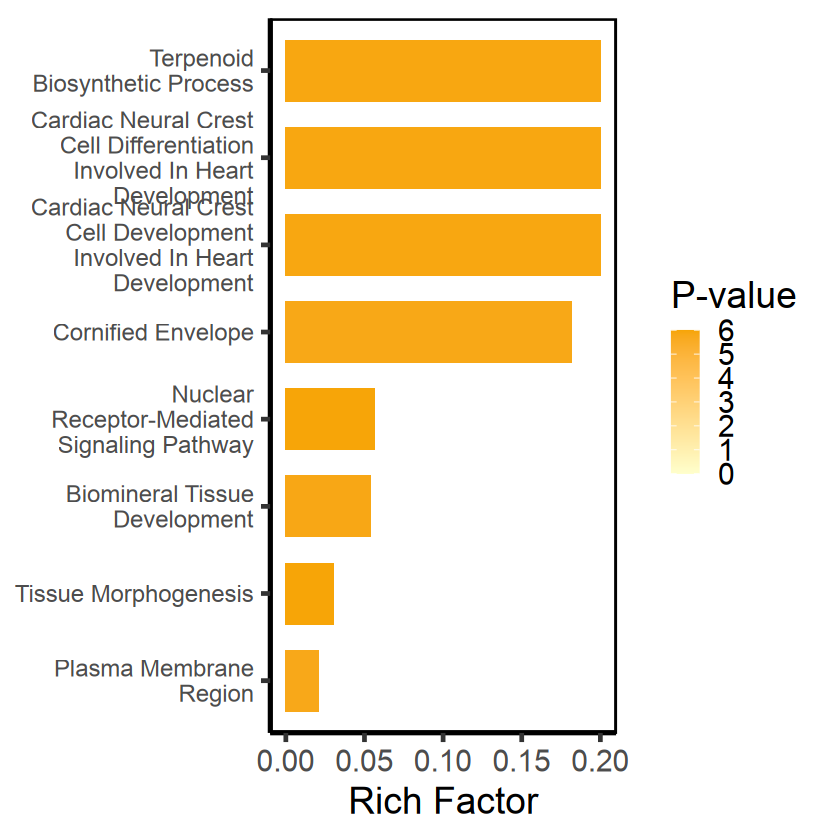

In [19]:
library(dplyr)
library(ggplot2)
library(stringr)
library(scales)   # for oob = squish

# col = list(Subtype = c("LUSC" = "#f7a507", "LUAD" = "#044904")),

df = LUSC_res@result %>%
  mutate(NegLogP = -log(pvalue)) %>%
  arrange(NegLogP) %>%
  mutate(Description = str_to_title(Description)) %>%
  mutate(Description = str_wrap(Description, width = 20)) %>%
  head(8)

LUSC_fig = ggplot(df, aes(
    x    = reorder(Description, RichFactor), 
    y    = RichFactor,
    fill = NegLogP                 # 用 pvalue 映射填色
  )) +
  geom_col(width = 0.7) +
  coord_flip() +
  
  # 3. 自定义配色：从“浅黄”到“深红”，并限定色标范围在 [0, 1e-4]
  scale_fill_gradient(
    low    = "#FFFFCC",           
    high   = "#f7a507",          
    limits = c(0, 6),        
    oob    = squish            
  ) +
  
  # 4. 图例和主题美化
  labs(
    x    = NULL,
    y    = "Rich Factor",
    fill = "P-value"
  ) +
  # theme_bw(base_size = 14) +
  theme_classic(base_size = 22) +
  theme(
    # draw a box around the panel
    panel.border     = element_rect(color = "black", fill = NA, size = 1),
    # ensure no background grid remnants
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    # if you want the background itself completely blank:
    panel.background = element_blank(),
    # fine‑tune axis text, legend, etc.
    axis.text.y      = element_text(size = 14),
    legend.position  = "right"
  )

LUSC_fig

LUSC_fig_path = paste0(save_path, "LUSC_GO_barplot.pdf")

ggsave(LUSC_fig_path, LUSC_fig)

Saving 7 x 7 in image


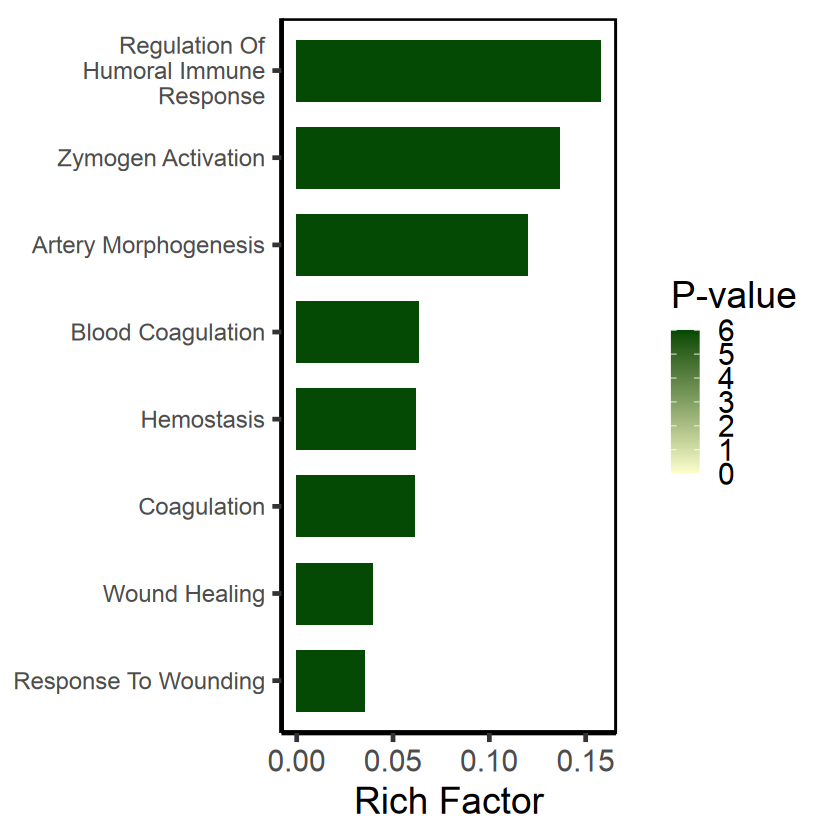

In [20]:
library(dplyr)
library(ggplot2)
library(scales)   # for oob = squish

# col = list(Subtype = c("LUSC" = "#f7a507", "LUAD" = "#044904")),

df = LUAD_res@result %>%
  mutate(NegLogP = -log(pvalue)) %>%
  arrange(NegLogP) %>%
  mutate(Description = str_to_title(Description)) %>%
  mutate(Description = str_wrap(Description, width = 20)) %>%
  head(8)

LUAD_fig = ggplot(df, 
  aes(
        x    = reorder(Description, RichFactor), 
        y    = RichFactor,
        fill = NegLogP                 # 用 pvalue 映射填色
  )) +
  geom_col(width = 0.7) +
  coord_flip() +
  
  # 3. 自定义配色：从“浅黄”到“深红”，并限定色标范围在 [0, 1e-4]
  scale_fill_gradient(
    low    = "#FFFFCC",           
    high   = "#044904",          
    limits = c(0, 6),        
    oob    = squish            
  ) +
  
  # 4. 图例和主题美化
  labs(
    x    = NULL,
    y    = "Rich Factor",
    fill = "P-value"
  ) +
  # theme_bw(base_size = 14) +
  theme_classic(base_size = 22) +
  theme(
    # draw a box around the panel
    panel.border     = element_rect(color = "black", fill = NA, size = 1),
    # ensure no background grid remnants
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    # if you want the background itself completely blank:
    panel.background = element_blank(),
    # fine‑tune axis text, legend, etc.
    axis.text.y      = element_text(size = 14),
    legend.position  = "right"
  )

LUAD_fig

LUAD_fig_path = paste0(save_path, "LUAD_GO_barplot.pdf")

ggsave(LUAD_fig_path, LUAD_fig)

In [63]:
LUSC_genes <- de_genes %>%
  dplyr::filter(logFC > 0) %>%  
  arrange(desc(logFC)) %>%
  head(100) 

# Get top 10 genes with lowest (most negative) log2FC
LUAD_genes <- de_genes %>%
  dplyr::filter(logFC < 0) %>%
  arrange(logFC) %>%
  head(100) 

In [64]:
LUSC_deg_path = paste0(save_path, "LUSC_deg.csv")
write.csv(LUSC_genes, LUSC_deg_path)

LUAD_deg_path = paste0(save_path, "LUAD_deg.csv")
write.csv(LUAD_genes, LUAD_deg_path)

In [65]:
save_path

[1] "/mnt/nrdstor/wanlab/xinchaowu/lung_cancer_subtype/binary_output/"